### Лабораторна робота №8. Структура даних граф. Алгоритми на графах
## Виконав студент групи КН23-1 Сидоренко Андрій

__Мета.__ _засвоїти подання структури даних граф та головні алгоритми роботи з ними засобами Python._ 

__Завдання на самостійну роботу__:

* Для варіанта, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі

__Відповідь:__

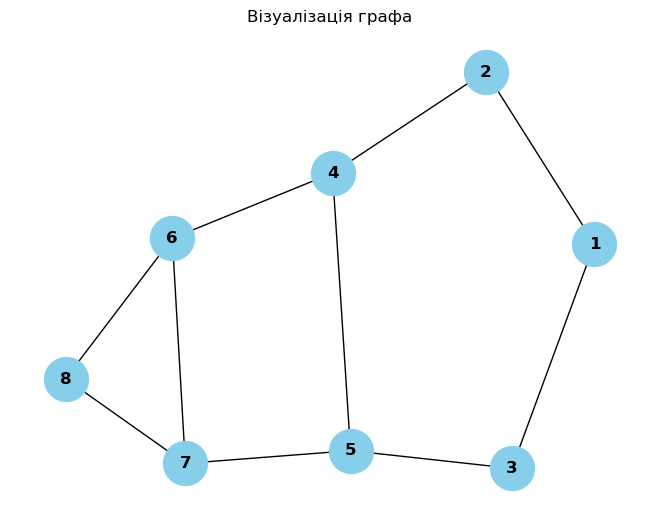

In [10]:
import matplotlib.pyplot as plt##Взято з лаби
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра
edges = [(1,2),(1,3),(2,4),(3,5),(4,5),(4,6),(5,7),(6,7),(6,8),(7,8)]##ПЗ5 варіант 18

# Додаємо ребра до графа
G.add_edges_from(edges)

# Візуалізуємо граф
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Візуалізація графа")
plt.show()

* Для свого варіанта реалізувати всі алгоритми, згідно з прикладами, наведеними вище

__Відповідь:__

# Алгоритм Дейкстри

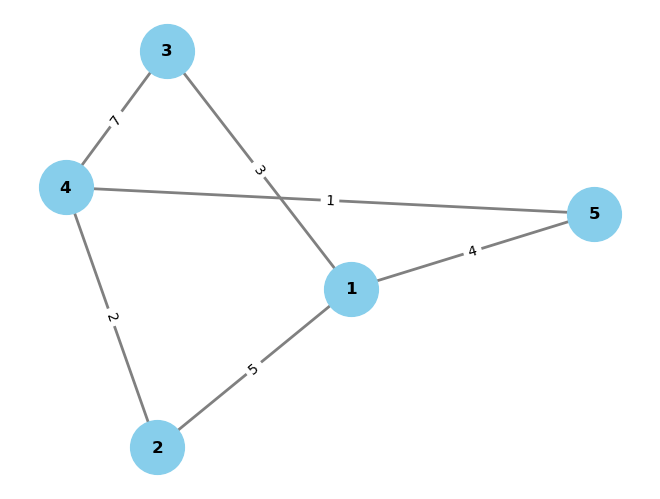

7
{3: 0, 1: 3, 4: 7, 5: 7, 2: 8}


({1: 0, 3: 3, 5: 4, 2: 5, 4: 5},
 {1: [1], 2: [1, 2], 3: [1, 3], 5: [1, 5], 4: [1, 5, 4]})

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {(1,2,5),(1,3,7),(2,4,9),(3,5,4),(4,5,1),(4,6,6),(5,7,8),(6,7,2),(6,8,4),(7,8,5)}

G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray", width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

length, path = nx.single_source_dijkstra(G, 3)

print(length[5])


print(length)
nx.single_source_dijkstra(G, source=1)

# Алгоритм Белмана-Форда

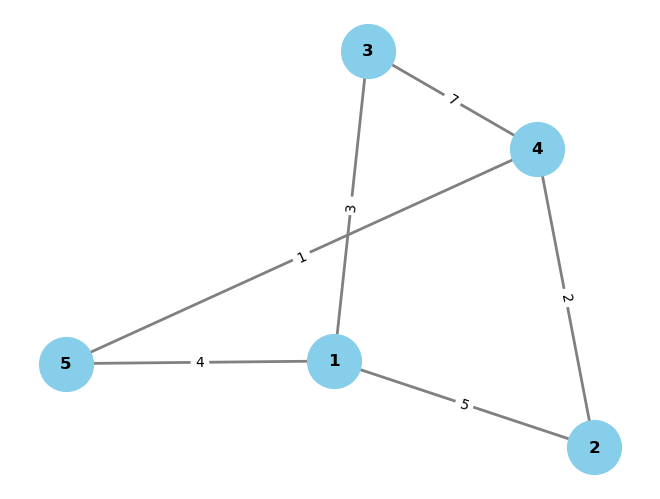

7
{3: 0, 1: 3, 4: 7, 2: 8, 5: 7}


{1: 0, 2: 5, 3: 3, 5: 4, 4: 5}

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {(1,2,5),(1,3,7),(2,4,9),(3,5,4),(4,5,1),(4,6,6),(5,7,8),(6,7,2),(6,8,4),(7,8,5)}

G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray", width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

length = nx.single_source_bellman_ford_path_length(G, 3)

print(length[5])


print(length)
nx.single_source_bellman_ford_path_length(G, source=1) 

# Пошук в глибину (DFS)

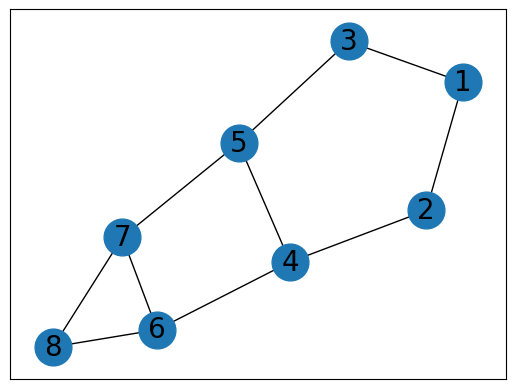

[['1', '2', '4', '5'],
 ['1', '2', '4', '6', '7', '5'],
 ['1', '2', '4', '6', '8', '7', '5'],
 ['1', '3', '5']]

In [38]:
%matplotlib inline

# Імпорт необхідних бібліотек
import networkx as nx
import matplotlib.pyplot as plt

# Створення пустого графа
G = nx.Graph()

# Додавання вершин та ребер
G.add_nodes_from(['1', '2', '3', '4', '5', '6', '7', '8'])#Мій граф з ПЗ
G.add_edges_from([('1', '2'), ('1', '3'), ('2', '4'), ('3', '5'),
                  ('4', '5'), ('4', '6'), ('5', '7'), ('6', '7'), ('6', '8'), ('7', '8')])

# Визначення позицій вершин для відображення графа
pos = nx.spring_layout(G)

# Візуалізація вершин та їх міток
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=G.edges())

# Показ графіка
plt.show()
def dfs(graph, start, visited=None):#Взято з лаби
    if visited is None:
        visited = set()  # Створюємо пустий набір для збереження відвіданих вершин
    visited.add(start)  # Додаємо поточну вершину до відвіданих
    # Перебираємо всі сусідні вершини поточної вершини
    for next in set(graph.adj[start].keys()) - visited:
        # Рекурсивно викликаємо функцію dfs для наступної вершини
        dfs(graph, next, visited)
    return visited

# Викликаємо функцію dfs з графом G та початковою вершиною 'C'
dfs(G, '1')

# Функція dfs_paths також використовує алгоритм пошуку в глибину (DFS),
# але вона знаходить всі можливі шляхи з початкової вершини до цільової вершини.
# Параметр path використовується для зберігання поточного шляху.
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]  # Починаємо з початкової вершини
    if start == goal:
        yield path  # Якщо досягли цільової вершини, повертаємо шлях
    # Перебираємо всі сусідні вершини поточної вершини, які ще не відвідані
    for next in set(graph.adj[start].keys()) - set(path):
        # Рекурсивно викликаємо функцію dfs_paths для наступної вершини
        yield from dfs_paths(graph, next, goal, path + [next])

# Викликаємо функцію dfs_paths з графом G, початковою вершиною 'C' та цільовою вершиною 'F'
list(dfs_paths(G, '1', '5'))


# Пошук у ширину

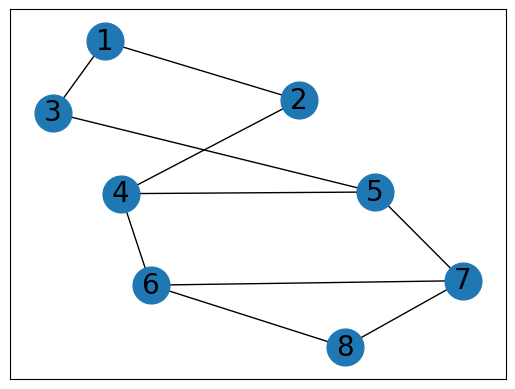

[['1', '3', '5'],
 ['1', '2', '4', '5'],
 ['1', '2', '4', '6', '7', '5'],
 ['1', '2', '4', '6', '8', '7', '5']]

In [37]:
%matplotlib inline

# Імпорт необхідних бібліотек
import networkx as nx
import matplotlib.pyplot as plt

# Створення пустого графа
G = nx.Graph()

# Додавання вершин та ребер
G.add_nodes_from(['1', '2', '3', '4', '5', '6', '7', '8'])#Мій граф з ПЗ
G.add_edges_from([('1', '2'), ('1', '3'), ('2', '4'), ('3', '5'),
                  ('4', '5'), ('4', '6'), ('5', '7'), ('6', '7'), ('6', '8'), ('7', '8')])

# Визначення позицій вершин для відображення графа
pos = nx.spring_layout(G)

# Візуалізація вершин та їх міток
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=G.edges())

# Показ графіка
plt.show()
def bfs_paths(graph, start, goal):#Взято з ЛБ
    # Створення черги з початковою вершиною та її шляхом
    queue = [(start, [start])]
    # Поки черга не порожня
    while queue:
        # Вибір вершини та її шляху спочатку черги
        (vertex, path) = queue.pop(0)
        # Для кожної сусідньої вершини
        for next in set(graph.adj[vertex].keys()) - set(path):
            # Якщо сусідня вершина є цільовою
            if next == goal:
                # Повернення шляху, якщо досягнуто цільову вершину
                yield path + [next]
            else:
                # Додавання сусідньої вершини та нового шляху в чергу
                queue.append((next, path + [next]))
# Виведення усіх шляхів від вершини 'A' до вершини 'F' за допомогою пошуку в ширину
list(bfs_paths(G, '1', '5'))

## Завдання на лабораторну роботу

1. Створити Notebook-документ і реалізувати приклади, що розглядаються у цій роботі, та виконати завдання до самостійної роботи.
2. Надати відповіді на контрольні питання.
3. Робочий документ оформити у вигляді Notebook-документа (файл .ipynb).
4. Скомпілювати звіт у форматі .html. Для цього необхідно завантажити термінал у робочому каталозі й у командному рядку запустити таку коман
ду:
jupyter nbconvert lab_8_StudentLastName.ipynb --to 

html
або, якщо наявна робота з налагодженим середовищем Qu
arto:
quarto preview lab_8_StudentLastName

ipynb
Проєкт має складатися мінімум з двох файлів: lab_8_StudentLastName.ipynb та lab_8_StudentLastName
.5tml. 
5. Дати відповіді на контрольні запитання.

## Контрольні запитання

1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.тму?


__Відповідь:__

Граф – це абстрактний тип даних, який призначений для реалізації концепцій неорієнтованого та орієнтованого графів, що походять з теорії графів. Граф складається з вузлів і вершин. Графи використовуються для моделювання дорожньої мережі, мережі громадського транспорту, маршрутів доставки. Для моделювання соціальних мереж, де вершини представляють користувачів, а ребра - зв'язки між ними. Для моделювання структури даних, таких як веб-сторінки та їх зв'язки, дерева файлової системи, мережі між комп'ютерами. І тд.

2. Які головні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.

__Відповідь:__

Існують орієнтовані графи, неорієнтовані графи, заважені графи, мультиграфи, псевдографи. Головною відмінностю між рієнтованими і неорієнтованими графами є напрямок ребер.  Орієнтовані графи мають напрямок для кожного ребра, тоді як неорієнтовані графи не мають напрямку. Через цей напрямок по різному записуються матриці суміжності і по різному представляють графи візуально.

3. Як можна подати граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.

__Відповідь:__

Граф можна подати у пам'яті комп'ютера за допомогою різних структур даних, які відображають його вершини, ребра та їхні зв'язки. 

Отже граф можна модати як матрицю суміжності, списком суміжності, списком ребер, хеш-таблицями, або матрицею інцидентності.


В матриці суміжності подається як, двовимірний масив де рядки і стовпці відповідають вершинам графу. Елемент матриці a[i][j] дорівнює 1, якщо існує ребро між вузлами i і j, і 0 у протилежному випадку.

Матриця інцидентності - це двовимірна таблиця, де кожен рядок відповідає вузлу, а кожен стовпець - ребру графа. Елемент матриці a[i][j] дорівнює 1, якщо вузол i інцидентний ребру j, і 0 у протилежному випадку.

Список суміжності - це набір списків, де кожен список відповідає вузлу графа і містить всі вузли, з якими він з'єднаний ребрами.


4. Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.

__Відповідь:__

Пошук у ширину (breadth-first search, BFS) – це метод обходу графа та пошуку шляхів у ньому.  Він відповідає за послідовний перегляд рівнів графа, розпочинаючи з вихідного вузла.* На кожному кроці алгоритму розглядаються всі ребр$ (u,) vщ овиходят ь звузл u. 
 Як щонаступн  ийвуз u  
 єцільо вимвуз, ло мтопо шукзавершуєт ь сявінш омувипа дкуву u л
 додає т ьсявч ерг удляподаль шогорозг. лядуП ісляперев ірки всіхр, еб ерщовихо д ятьзв uул а
 з чергивилуча єтьсянаст упний ол
 $u, і процес повторю


Приклади ситуацій, де застосовується алгоритм BFS:
* 
Пошук найкоротшого шляху в незваженому гра.* 

Обхід гм* и.

Розв'язання голова* ном.

Виявлення циклів * графі.

Відстань від джерела до в в графі.

Аих науках і широко застосовується в різних галузях, включаючи аналіз даних, машинне навчання, розробку програмного забезпечення та бато інших.

ється.

5. Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Надайте приклади задач, де використовується DFS.

__Відповідь:__

Пошук у глибину (Depth-first search, DFS) – один з методів обходу графа.  Стратегія пошуку в глибину, як можна зрозуміти з її назви, полягає у тому, щоб проникнути «вглиб» графа настільки, наскільки це можливо. Під час виконання алгоритму пошуку використовується рекурсивний підхід: перебираються всі ребра, що виходять з поточної вершини. Якщо ребро вказує на вершину, яка ще не була розглянута, то запускається алгоритм пошуку від цієї нової вершини. Після завершення виконання алгоритму повертаємося і продовжуємо перебирати ребра. Повернення відбувається, коли в поточній вершині більше не залишилося ребер, що вказують на невідвідану вершину. Якщо після завершення алгоритму ще залишилися невідвідані вершини, то необхідно запустити алгоритм пошуку від однієї з цих вершин. 


Основна відмінність між DFS і BFS полягає в тому, як вони обходять граф. BFS обходить граф у ширину, відвідуючи всі вузли на даній відстані від початкового вузла перед переходом до наступної відстані. DFS, з іншого боку, обходить граф у глибину, просуваючись углиб графа, перш ніж повертатися назад і досліджувати інші гілки.

Приклади задач, де використовується DFS:
* 
Пошук шляхів у гра.* 

Виявлення циклів в гф* і.

Розфарбуванняо* лір.

Пошук компонент звз* аними.

Розв'язання гіагато інших.

6. Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?

__Відповідь:__

Алгоритм Дейкстри - це алгоритм для знаходження найкоротшого шляху вагованого графа від однієї початкової вершини до всіх інших вершин. Основна ідея полягає в тому, щоб систематично вибирати вершину з найменшою відстанню від початкової вершини і оновлювати відстані до сусідніх вершин, якщо знайдений шлях є коротшим.

Умови для успішної роботи алгоритму Дейкстри:
* 
Вагований гро.* 

Неот'ємні ам* и.

Напрямленість ребер (опціонре* бер.

Відсутність циклів ваги менше 0 (опціностями.